# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import category_encoders as ce

# Importing dataset

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Data cleaning

In [3]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
df.shape

(119390, 32)

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df.children = df.children.fillna(df.children.mode().iloc[0])

In [8]:
df.country = df.country.fillna(df.country.mode().iloc[0])

In [9]:
df.agent = df.agent.fillna(df.agent.mean())

In [10]:
df.company = df.company.fillna(df.company.mean())

In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,189.266735,0,Transient,98.0,0,1,Check-Out,2015-07-03


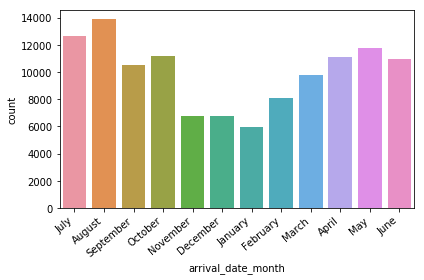

In [13]:
arrival_month = sns.countplot(df.arrival_date_month)
arrival_month.set_xticklabels(arrival_month.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

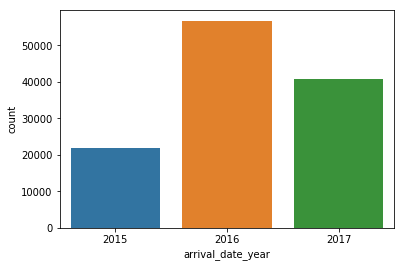

In [14]:
sns.countplot(df.arrival_date_year)

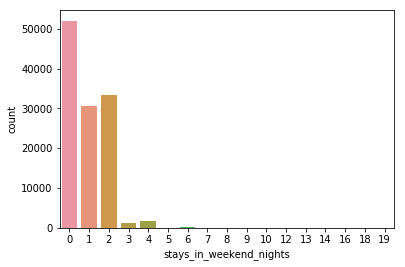

In [15]:
sns.countplot(df.stays_in_weekend_nights)

In [16]:
df.stays_in_weekend_nights.value_counts()

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [17]:
df.stays_in_week_nights.value_counts()

2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
18        6
25        6
30        5
17        4
24        3
40        2
42        1
26        1
32        1
33        1
34        1
35        1
41        1
50        1
Name: stays_in_week_nights, dtype: int64

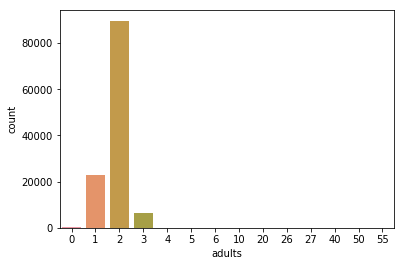

In [18]:
sns.countplot(df.adults)

In [19]:
df.adults.value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64

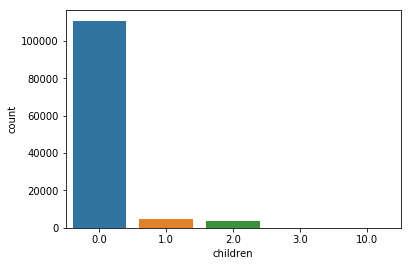

In [20]:
sns.countplot(df.children)

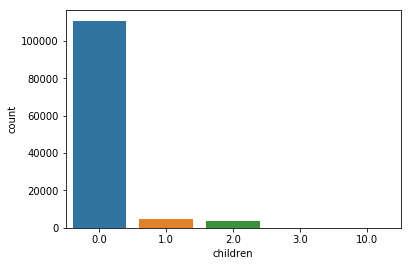

In [21]:
sns.countplot(df.children)

In [22]:
df.children.value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [23]:
df.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [24]:
df.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [25]:
df.total_of_special_requests.value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [26]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,189.266735,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [27]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# Best time of year to book hotel room

In [28]:
df1 = df.copy()

In [29]:
rh = df1.loc[(df1['hotel']== 'Resort Hotel')]
ch = df1.loc[(df1['hotel']== 'City Hotel')]

In [30]:
resort_hotel = rh.groupby("arrival_date_month")["hotel"].count()
city_hotel = ch.groupby("arrival_date_month")["hotel"].count()

In [31]:
resort_hotel_data = pd.DataFrame({"month": list(resort_hotel.index),"hotel": "Resort hotel","guests": list(resort_hotel.values)})

In [32]:
city_hotel_data = pd.DataFrame({"month": list(city_hotel.index),"hotel": "City hotel","guests": list(city_hotel.values)})

In [33]:
total_data = pd.concat([resort_hotel_data,city_hotel_data], ignore_index=True)

In [34]:
# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]

In [35]:
total_data["month"] = pd.Categorical(total_data["month"], categories=ordered_months, ordered=True)

In [36]:
total_data.loc[(total_data["month"] == "July") | (total_data["month"] == "August"),"guests"] /= 3

In [37]:
total_data.loc[~((total_data["month"] == "July") | (total_data["month"] == "August")),"guests"] /= 2

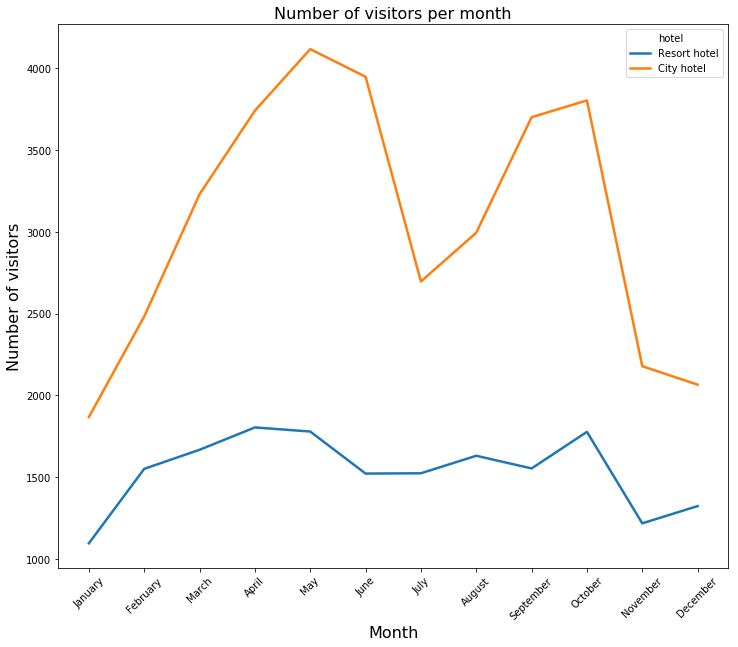

In [38]:
#show figure:
plt.figure(figsize=(12, 10))
sns.lineplot(x = "month", y="guests", hue="hotel", data=total_data, 
             hue_order = ["Resort hotel", "City hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Number of visitors per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of visitors", fontsize=16)
plt.show()

Here, we can easily see that both resort hotel and city hotel have least visitors in janurary and then in december. So the best time to book a hotel room is janurary

In [39]:
df1['stay_in_hotel'] = df1['stays_in_week_nights'] + df1['stays_in_weekend_nights']
print(df1)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
5       Resort Hotel            0         14               2015   
6       Resort Hotel            0          0               2015   
7       Resort Hotel            0          9               2015   
8       Resort Hotel            1         85               2015   
9       Resort Hotel            1         75               2015   
10      Resort Hotel            1         23               2015   
11      Resort Hotel            0         35               2015   
12      Resort Hotel            0         68               2015   
13      Resort Hotel            0         18               201

In [40]:
df1.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [41]:
df1 = df1.drop(['arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','meal','country','market_segment','distribution_channel','is_repeated_guest','booking_changes','deposit_type','agent','company','customer_type','adr','reservation_status','reservation_status_date','assigned_room_type','reserved_room_type','reservation_status_date'],axis=1)

In [42]:
X = df1.drop('arrival_date_month',axis = 1)
X.shape

(119390, 10)

In [43]:
y = df1['arrival_date_month']
y.shape

(119390,)

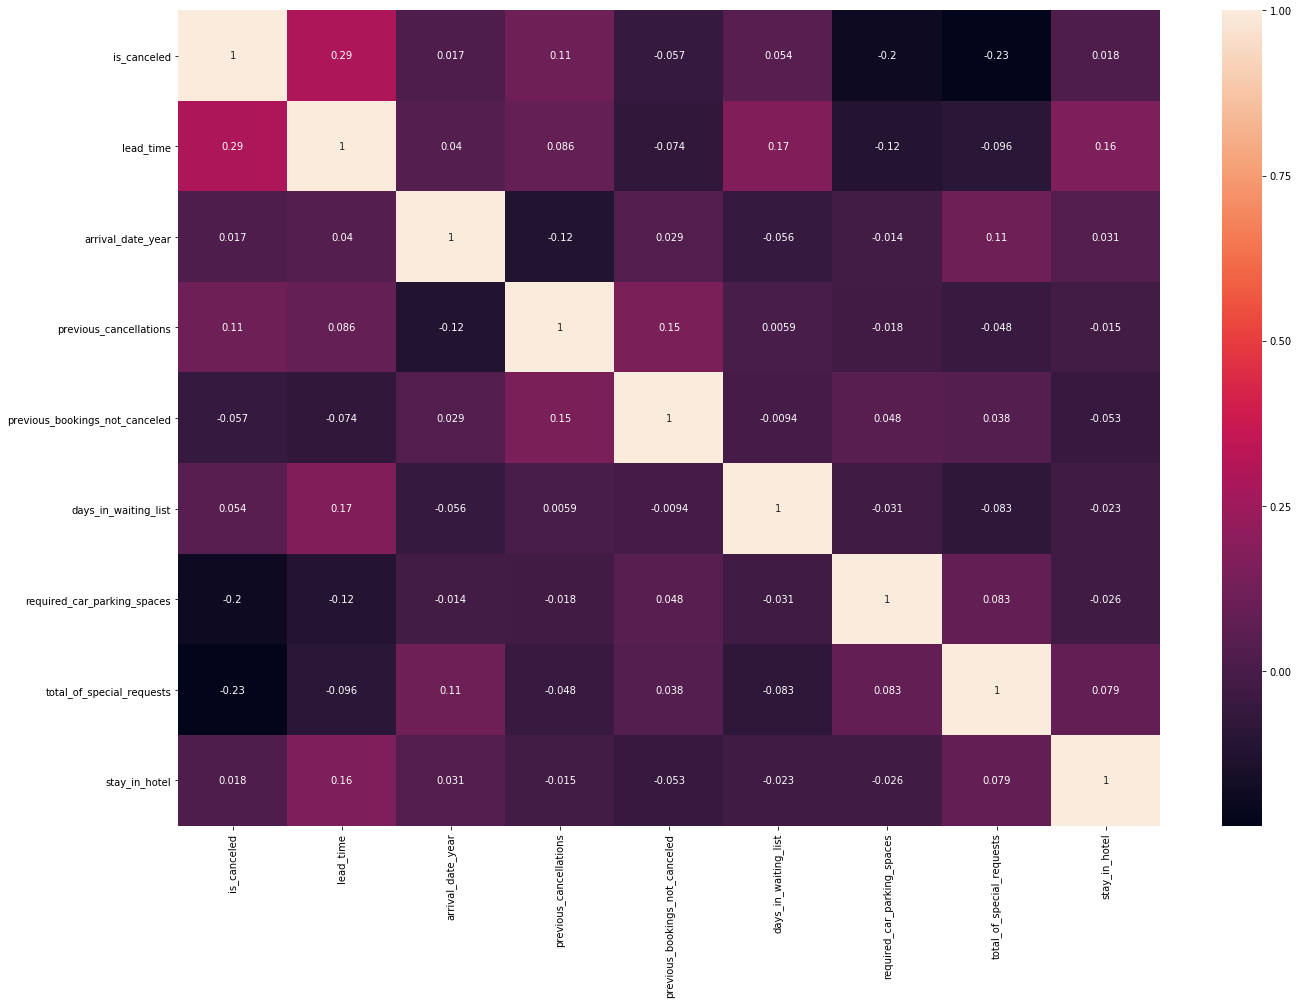

In [44]:
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df1.corr(), annot=True, ax=ax);

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state= 2)
print(len(X_train),len(X_test))

95512 23878


In [46]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,stay_in_hotel
0,Resort Hotel,0,342,2015,July,0,0,0,0,0,0
1,Resort Hotel,0,737,2015,July,0,0,0,0,0,0
2,Resort Hotel,0,7,2015,July,0,0,0,0,0,1
3,Resort Hotel,0,13,2015,July,0,0,0,0,0,1
4,Resort Hotel,0,14,2015,July,0,0,0,0,1,2


In [47]:
encoder = ce.OneHotEncoder(cols = ['hotel','arrival_date_year'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [48]:
X_train.head()

,hotel_1,hotel_2,is_canceled,lead_time,arrival_date_year_1,arrival_date_year_2,arrival_date_year_3,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,stay_in_hotel
67448,1,0,1,59,1,0,0,0,0,0,0,0,4
35887,0,1,0,41,1,0,0,0,0,0,0,0,4
114815,1,0,0,396,1,0,0,0,0,0,0,1,2
61168,1,0,1,28,0,1,0,0,0,0,0,1,2
82194,1,0,0,0,0,0,1,0,0,0,0,1,4


In [49]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,stay_in_hotel
0,Resort Hotel,0,342,2015,July,0,0,0,0,0,0
1,Resort Hotel,0,737,2015,July,0,0,0,0,0,0
2,Resort Hotel,0,7,2015,July,0,0,0,0,0,1
3,Resort Hotel,0,13,2015,July,0,0,0,0,0,1
4,Resort Hotel,0,14,2015,July,0,0,0,0,1,2


In [50]:
X_train.shape

(95512, 13)

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Harsh Singh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Harsh Singh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Harsh Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [52]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [53]:
y_pred = dt.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1159  153   65  139   90  127  117  139  147   46   46   29]
 [ 228 1195  116  138   89  283  148  103  123   64  103  117]
 [  76   96  678   64   36   59   39   56   26   86  133   86]
 [ 166   79   47  698  169   73   67  136   74   38   19   20]
 [ 123   73   31  207  486   44   61   80   55   19   11   13]
 [ 190  322   79  115   96  998  167   97  137   45   98   79]
 [ 186  192   52  113   92  173  970  122  145   28   25   42]
 [ 242  126   61  210  134   89  126  765  103   58   27   27]
 [ 258  198   36  164  112  175  137  148 1033   33   39   51]
 [  74   97  124   85   32   61   35   72   29  584  102   60]
 [  85  166  141   74   36   92   60   67   46  111 1258  114]
 [  74  180   96   59   29  113   53   48   52   83  154 1229]]


In [55]:
def Score(dt,X_train,y_train,X_test,y_test):
    train_score = dt.score(X_train,y_train)
    test_score = dt.score(X_test,y_test)

    print(f'Training Accuracy of our model is: {train_score}')
    print(f'Test Accuracy of our model is: {test_score}')

Score(dt,X_train,y_train,X_test,y_test)

Training Accuracy of our model is: 0.7237833989446353
Test Accuracy of our model is: 0.46289471480023453


# Optimal length of stay in order to get the best daily rate

In [56]:
df2 = df.copy()

In [57]:
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,189.266735,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [58]:
df2['stay_in_hotel'] = df2['stays_in_week_nights'] + df2['stays_in_weekend_nights']
print(df2)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
5       Resort Hotel            0         14               2015   
6       Resort Hotel            0          0               2015   
7       Resort Hotel            0          9               2015   
8       Resort Hotel            1         85               2015   
9       Resort Hotel            1         75               2015   
10      Resort Hotel            1         23               2015   
11      Resort Hotel            0         35               2015   
12      Resort Hotel            0         68               2015   
13      Resort Hotel            0         18               201

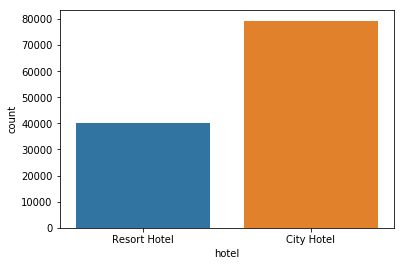

In [59]:
sns.countplot(df2.hotel)

In [60]:
df2.adr

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
5          98.00
6         107.00
7         103.00
8          82.00
9         105.50
10        123.00
11        145.00
12         97.00
13        154.77
14         94.71
15         97.00
16         97.50
17         88.20
18        107.42
19        153.00
20         97.29
21         84.67
22         84.67
23         99.67
24         94.95
25         63.60
26         79.50
27        107.00
28         94.00
29         87.30
           ...  
119360    117.00
119361     95.85
119362    119.17
119363     92.17
119364     92.17
119365    266.75
119366     85.59
119367     85.59
119368     99.00
119369     96.25
119370    108.00
119371     86.85
119372     82.35
119373     82.35
119374    117.00
119375     85.50
119376    209.25
119377     99.00
119378     86.85
119379    155.00
119380    140.75
119381     99.00
119382    209.00
119383     87.60
119384     96.14
119385     96.14
119386    225.43
119387    157.

In [61]:
rh = df2.loc[(df2['hotel']== 'Resort Hotel')]
ch = df2.loc[(df2['hotel']== 'City Hotel')]

In [62]:
# Create a DateFrame with the relevant data:
resort_hotel = rh.groupby("stay_in_hotel")["hotel"].count()
city_hotel = ch.groupby("stay_in_hotel")["hotel"].count()

In [63]:
adr_rh = rh.groupby("adr")["hotel"].count()
adr_ch = ch.groupby("adr")["hotel"].count()

In [64]:
total_stay_rh = list(rh["stay_in_hotel"].value_counts().index)
adr_rh = list(rh["adr"].value_counts())
final_rh = rh["stay_in_hotel"].value_counts() * sum(adr_rh)

In [65]:
total_stay_ch = list(ch["stay_in_hotel"].value_counts().index)
adr_ch = list(ch["adr"].value_counts())
final_ch = ch["stay_in_hotel"].value_counts() * sum(adr_ch)

In [66]:
rh_stay = pd.DataFrame({"hotel": "Resort hotel","total_stay": total_stay_rh,"adr": final_rh})

In [67]:
ch_stay = pd.DataFrame({"hotel": "City hotel","total_stay": total_stay_ch,"adr": final_ch})

In [68]:
total_data = pd.concat([rh_stay, ch_stay], ignore_index=True)

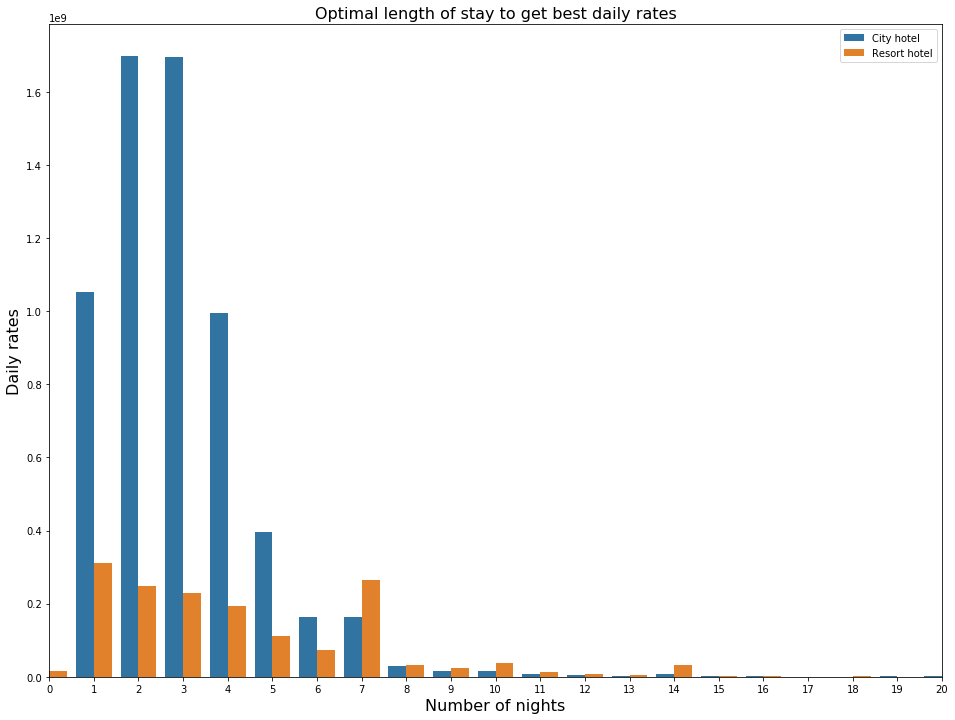

In [69]:
plt.figure(figsize=(16, 12))
sns.barplot(x = "total_stay", y = "adr", hue="hotel", data=total_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Optimal length of stay to get best daily rates", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Daily rates", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,20)
plt.show()

Here,
Resort hotel : Optimal length of stay in order to get best daily rates is for 6 days and then 5 days then 4 days then 3 and 2 days to get best rates.

City hotel: Optimal length of stay in order to get best daily rates is for 6 days and 7 days then 5 days then 4 and 1 day to get best rates.

In [70]:
df2 = df2.drop(['previous_cancellations','previous_bookings_not_canceled','arrival_date_month','total_of_special_requests','required_car_parking_spaces','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','meal','country','market_segment','distribution_channel','is_repeated_guest','booking_changes','deposit_type','agent','company','customer_type','reservation_status','reservation_status_date','assigned_room_type','reserved_room_type','reservation_status_date'],axis=1)

In [71]:
X1 = df2.drop('stay_in_hotel',axis = 1)
X1.shape

(119390, 8)

In [72]:
y1 = df2['stay_in_hotel']
y1.shape

(119390,)

In [73]:
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,days_in_waiting_list,adr,stay_in_hotel
0,Resort Hotel,0,342,2015,27,1,0,0.0,0
1,Resort Hotel,0,737,2015,27,1,0,0.0,0
2,Resort Hotel,0,7,2015,27,1,0,75.0,1
3,Resort Hotel,0,13,2015,27,1,0,75.0,1
4,Resort Hotel,0,14,2015,27,1,0,98.0,2


In [74]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size =0.2, random_state= 0)
print(len(X1_train),len(X1_test))

95512 23878


In [75]:
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,days_in_waiting_list,adr,stay_in_hotel
0,Resort Hotel,0,342,2015,27,1,0,0.0,0
1,Resort Hotel,0,737,2015,27,1,0,0.0,0
2,Resort Hotel,0,7,2015,27,1,0,75.0,1
3,Resort Hotel,0,13,2015,27,1,0,75.0,1
4,Resort Hotel,0,14,2015,27,1,0,98.0,2


In [76]:
encoder1 = ce.OneHotEncoder(cols = ['hotel','arrival_date_year'])

X1_train = encoder1.fit_transform(X1_train)
X1_test = encoder1.transform(X1_test)

In [77]:
X1_train.head()

,hotel_1,hotel_2,is_canceled,lead_time,arrival_date_year_1,arrival_date_year_2,arrival_date_year_3,arrival_date_week_number,arrival_date_day_of_month,days_in_waiting_list,adr
55159,1,0,1,66,1,0,0,32,6,0,168.3
56190,1,0,1,51,1,0,0,36,31,0,123.3
97444,1,0,0,22,1,0,0,38,15,0,149.0
64854,1,0,1,69,0,1,0,11,17,0,153.0
110580,1,0,0,14,0,1,0,17,25,0,324.5


In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

C:\Users\Harsh Singh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Harsh Singh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Harsh Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [79]:
dt2 = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt2.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [80]:
y1_pred = dt2.predict(X1_test)

In [81]:
def Score(dt2,X1_train,y1_train,X1_test,y1_test):
    train_score = dt2.score(X1_train,y1_train)
    test_score = dt2.score(X1_test,y1_test)

    print(f'Training Accuracy of our model is: {train_score}')
    print(f'Test Accuracy of our model is: {test_score}')
        
Score(dt2,X1_train,y1_train,X1_test,y1_test)

Training Accuracy of our model is: 0.9864624340397018
Test Accuracy of our model is: 0.5576681464109222


# Disappropriate high no of guest

In [82]:
df3 = df.copy()

In [83]:
df3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,189.266735,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [84]:
df3['stay_in_hotel'] = df3['stays_in_week_nights'] + df3['stays_in_weekend_nights']
print(df3)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
5       Resort Hotel            0         14               2015   
6       Resort Hotel            0          0               2015   
7       Resort Hotel            0          9               2015   
8       Resort Hotel            1         85               2015   
9       Resort Hotel            1         75               2015   
10      Resort Hotel            1         23               2015   
11      Resort Hotel            0         35               2015   
12      Resort Hotel            0         68               2015   
13      Resort Hotel            0         18               201

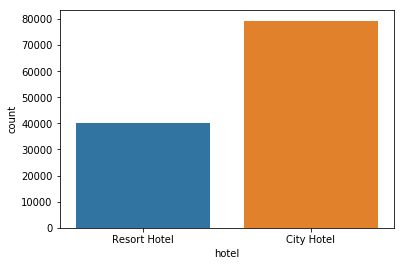

In [85]:
sns.countplot(df3.hotel)

In [86]:
rh = df3.loc[(df3['hotel']== 'Resort Hotel')]
ch = df3.loc[(df3['hotel']== 'City Hotel')]

In [87]:
# Create a DateFrame with the relevant data:
special_req_rh = rh.groupby("total_of_special_requests")["hotel"].count()
special_req_ch = ch.groupby("total_of_special_requests")["hotel"].count()

In [88]:
total_req_rh2 = list(rh["total_of_special_requests"].value_counts().index)
sp_req_rh2 = list(rh["total_of_special_requests"].value_counts())
final_rh2 = rh["total_of_special_requests"].value_counts()

In [89]:
total_req_ch2 = list(ch["total_of_special_requests"].value_counts().index)
sp_req_ch2 = list(ch["total_of_special_requests"].value_counts())
final_ch2 = ch["total_of_special_requests"].value_counts()

In [90]:
rh_sp_req = pd.DataFrame({"hotel": "Resort hotel","total_req2": total_req_rh2,"final2": final_rh2})

In [91]:
ch_sp_req = pd.DataFrame({"hotel": "City hotel","total_req2": total_req_ch2,"final2": final_ch2})

In [92]:
total_data2 = pd.concat([rh_sp_req, ch_sp_req], ignore_index=True)

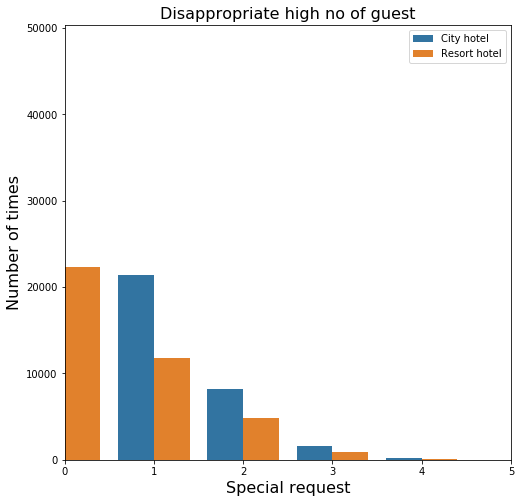

In [93]:
plt.figure(figsize=(8, 8))
sns.barplot(x = "total_req2", y = "final2", hue="hotel", data=total_data2,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Disappropriate high no of guest", fontsize=16)
plt.xlabel("Special request", fontsize=16)
plt.ylabel("Number of times", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,5)
plt.show()

Here,
In all the cases City hotel is likely to receive disappropriate high no of guest as compared to Resort hotel

In [94]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [95]:
df3 = df3.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','previous_cancellations','previous_bookings_not_canceled','arrival_date_month','booking_changes','required_car_parking_spaces','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','meal','country','deposit_type','assigned_room_type','reserved_room_type','reservation_status_date'],axis=1)

In [96]:
df3.head()

,hotel,is_canceled,lead_time,market_segment,distribution_channel,is_repeated_guest,agent,company,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,stay_in_hotel
0,Resort Hotel,0,342,Direct,Direct,0,86.693382,189.266735,0,Transient,0.0,0,Check-Out,0
1,Resort Hotel,0,737,Direct,Direct,0,86.693382,189.266735,0,Transient,0.0,0,Check-Out,0
2,Resort Hotel,0,7,Direct,Direct,0,86.693382,189.266735,0,Transient,75.0,0,Check-Out,1
3,Resort Hotel,0,13,Corporate,Corporate,0,304.000000,189.266735,0,Transient,75.0,0,Check-Out,1
4,Resort Hotel,0,14,Online TA,TA/TO,0,240.000000,189.266735,0,Transient,98.0,1,Check-Out,2


In [97]:
X2 = df3.drop('total_of_special_requests',axis = 1)
X2.shape

(119390, 13)

In [98]:
y2 = df3['total_of_special_requests']
y2.shape

(119390,)

In [99]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size =0.2, random_state= 0)
print(len(X2_train),len(X2_test))

95512 23878


In [100]:
df3.head()

,hotel,is_canceled,lead_time,market_segment,distribution_channel,is_repeated_guest,agent,company,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,stay_in_hotel
0,Resort Hotel,0,342,Direct,Direct,0,86.693382,189.266735,0,Transient,0.0,0,Check-Out,0
1,Resort Hotel,0,737,Direct,Direct,0,86.693382,189.266735,0,Transient,0.0,0,Check-Out,0
2,Resort Hotel,0,7,Direct,Direct,0,86.693382,189.266735,0,Transient,75.0,0,Check-Out,1
3,Resort Hotel,0,13,Corporate,Corporate,0,304.000000,189.266735,0,Transient,75.0,0,Check-Out,1
4,Resort Hotel,0,14,Online TA,TA/TO,0,240.000000,189.266735,0,Transient,98.0,1,Check-Out,2


In [101]:
encoder2 = ce.OneHotEncoder(cols = ['hotel','market_segment','distribution_channel','customer_type','reservation_status'])

X2_train = encoder2.fit_transform(X2_train)
X2_test = encoder2.transform(X2_test)

In [102]:
X2_train.head()

,hotel_1,hotel_2,is_canceled,lead_time,market_segment_1,market_segment_2,market_segment_3,market_segment_4,market_segment_5,market_segment_6,...,days_in_waiting_list,customer_type_1,customer_type_2,customer_type_3,customer_type_4,adr,reservation_status_1,reservation_status_2,reservation_status_3,stay_in_hotel
55159,1,0,1,66,1,0,0,0,0,0,...,0,1,0,0,0,168.3,1,0,0,4
56190,1,0,1,51,1,0,0,0,0,0,...,0,1,0,0,0,123.3,1,0,0,5
97444,1,0,0,22,1,0,0,0,0,0,...,0,1,0,0,0,149.0,0,1,0,1
64854,1,0,1,69,1,0,0,0,0,0,...,0,1,0,0,0,153.0,1,0,0,5
110580,1,0,0,14,0,1,0,0,0,0,...,0,1,0,0,0,324.5,0,1,0,4


In [103]:
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

C:\Users\Harsh Singh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Harsh Singh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Harsh Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
dt3 = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt3.fit(X2_train,y2_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [105]:
y2_pred = dt3.predict(X2_test)

In [106]:
def Score(dt3,X2_train,y2_train,X2_test,y2_test):
    train_score = dt3.score(X2_train,y2_train)
    test_score = dt3.score(X2_test,y2_test)

    print(f'Training Accuracy of our model is: {train_score}')
    print(f'Test Accuracy of our model is: {test_score}')
    
Score(dt3,X2_train,y2_train,X2_test,y2_test)

Training Accuracy of our model is: 0.971794120110562
Test Accuracy of our model is: 0.6726275232431527
